In [12]:
import sqlite3
import pandas as pd

try:
    sqlite_connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print('УСПЕШНО')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)

УСПЕШНО


In [13]:
request = "select uid, datetime from pageviews where uid like 'user_%'"
df = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['datetime'])
df

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


In [14]:
request = "select uid, timestamp from checker where uid like 'user_%'"
commits = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [15]:
df_views = df.groupby(df['datetime'].dt.floor('d')).count()['uid']
df_views

datetime
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: uid, dtype: int64

In [16]:
df_commits = commits.groupby(commits['timestamp'].dt.floor('d')).count()['uid']
df_commits

timestamp
2020-04-17     23
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-28      5
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-02    242
2020-05-03    180
2020-05-04     37
2020-05-05    139
2020-05-06      2
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-10    143
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-15     10
2020-05-16      4
2020-05-17     48
2020-05-18      3
2020-05-19     34
2020-05-20     28
2020-05-21     49
Name: uid, dtype: int64

In [17]:
df = pd.concat([df_views, df_commits], axis=1)
df = df.dropna()
df

,uid,uid
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0
2020-04-23,5.0,43.0
2020-04-25,1.0,104.0
2020-04-26,8.0,261.0
2020-04-28,2.0,5.0
2020-04-29,4.0,17.0


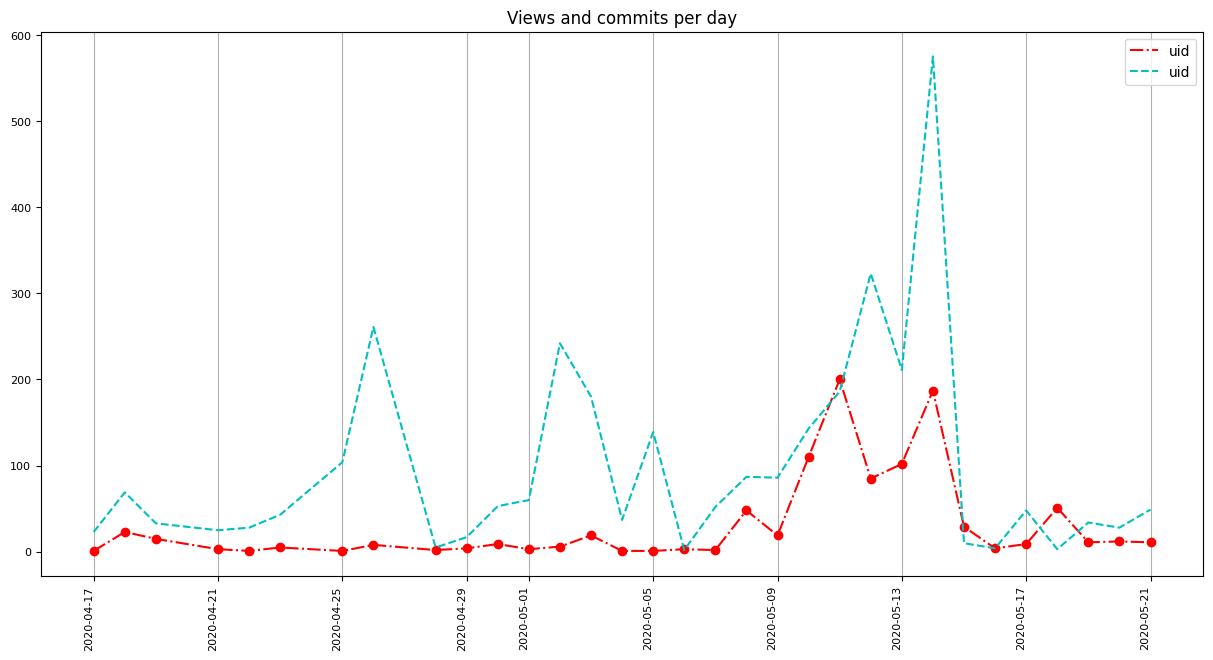

In [21]:
ax = df.plot(figsize=(15, 8), title='Views and commits per day',
             color=['r', 'c'], style=['-.', '--'], rot=90, fontsize=8)
ax.get_lines()[0].set_marker('o')
ax.grid(axis='x')

In [ ]:
df['uid']

,uid,uid
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0
2020-04-23,5.0,43.0
2020-04-25,1.0,104.0
2020-04-26,8.0,261.0
2020-04-28,2.0,5.0
2020-04-29,4.0,17.0


“How many times was the number of views larger than 150?” Insert: “The answer is 2”.

In [ ]:
sqlite_connection.close()